Przygotowanie danych 

In [63]:
import gzip
import numpy as np
import time
import matplotlib.pyplot as plt 

In [64]:
IMAGE_SIZE = 28

validation_image = gzip.open(".\\validate\\t10k-images-idx3-ubyte.gz", "r")
validation_labels = gzip.open(".\\validate\\t10k-labels-idx1-ubyte.gz", "r")

train_image = gzip.open(".\\train\\train-images-idx3-ubyte.gz", "r")
train_labels = gzip.open(".\\train\\train-labels-idx1-ubyte.gz", "r")

validation_image.read(16)
validation_labels.read(8)
train_image.read(16)
train_labels.read(8)

def is_prime(x):
    if x in [2,3,5,7]:
        return 1
    elif x in [4,6,8]:
        return 0 
    return -1

is_prime = np.vectorize(is_prime)

def generate_matrices(buffer, length):
    M = np.frombuffer(buffer, dtype=np.uint8)
    M = M.reshape(int(M.shape[0]/(length**2)), -1)

    return M

def generate_map(labels):
    map = np.argwhere(labels == -1)
    return map.T[0]


X = generate_matrices(train_image.read(), IMAGE_SIZE)
y = is_prime(generate_matrices(train_labels.read(), 1))
map = generate_map(y)

X = np.delete(X, map, 0)
y = np.delete(y, map, 0)



v_X = generate_matrices(validation_image.read(), IMAGE_SIZE)
v_y = is_prime(generate_matrices(validation_labels.read(), 1))
map = generate_map(v_y)

v_X = np.delete(v_X, map, 0)
v_y = np.delete(v_y, map, 0)

print(X.shape)
print(y.shape)



(41386, 784)
(41386, 1)


Model

In [68]:
theta = np.zeros((IMAGE_SIZE **2, 1))
step_size = 0.003
epochs = 96
momentum = 0.9
reg = 0.00001

np.random.seed(1337)

def sigma(z):
    return 1 / (1 + np.exp(-z))

def cost(theta, X, y):
    cost = y*np.log(sigma(np.matmul(X,theta)) + 1e-7)+(1-y)*np.log(1-sigma(np.matmul(X,theta)) +1e-7) 
    reg_cost = reg/2 * theta**2 
    return cost.mean() - reg_cost.mean()
    
    
def fit(X, y):
    theta = np.zeros((IMAGE_SIZE **2, 1))
    V = np.zeros((IMAGE_SIZE **2, 1))
    y_axis = []
    
    start = time.time()
    iteration_start = start
    permutation = np.arange(X.shape[0])
    for epoch in range(1, epochs+1):
        np.random.shuffle(permutation)
        for i in permutation:
            gradient = (y[i] - sigma(np.matmul(theta.T, X[i])))*X[i].reshape(IMAGE_SIZE**2, 1) - 2*reg*theta
            V = momentum * V + (1-momentum) * gradient
            theta = theta + step_size*V
            
        print(f"{epoch}/{epochs} iteracja zakonczona po {time.time() - iteration_start}")
        iteration_start = time.time()
        y_axis.append(cost(theta, X, y))  
      
    x_axis = np.arange(0, len(y_axis))
    fig, ax = plt.subplots()
    ax.plot(x_axis, y_axis)
    plt.show()
        
    print(f"trening zakonczony po {time.time() - start}")
    print("lowest", y_axis.index(min(y_axis)))
    
    return theta

def predict(theta, X):
    return sigma(theta.T @ X)

def evaluate(theta, X, y):
    correct = 0.0
    total = 0.0 
    
    for i in range(X.shape[0]):
        if np.rint(predict(theta, X[i])) == y[i] : 
            correct += 1 
        total += 1 
    return correct/total


1/96 iteracja zakonczona po 1.5747263431549072
2/96 iteracja zakonczona po 1.9636380672454834
3/96 iteracja zakonczona po 1.8590350151062012
4/96 iteracja zakonczona po 1.8990015983581543
5/96 iteracja zakonczona po 1.912186622619629
6/96 iteracja zakonczona po 1.8834586143493652
7/96 iteracja zakonczona po 1.9300878047943115
8/96 iteracja zakonczona po 1.9722223281860352
9/96 iteracja zakonczona po 1.8765931129455566
10/96 iteracja zakonczona po 1.8284244537353516
11/96 iteracja zakonczona po 1.936948537826538
12/96 iteracja zakonczona po 1.9387798309326172
13/96 iteracja zakonczona po 1.8900856971740723
14/96 iteracja zakonczona po 1.9354677200317383
15/96 iteracja zakonczona po 1.9714577198028564
16/96 iteracja zakonczona po 1.9291470050811768
17/96 iteracja zakonczona po 1.9205660820007324
18/96 iteracja zakonczona po 1.8673713207244873
19/96 iteracja zakonczona po 1.8767313957214355
20/96 iteracja zakonczona po 1.9474053382873535
21/96 iteracja zakonczona po 1.986922264099121
22/9

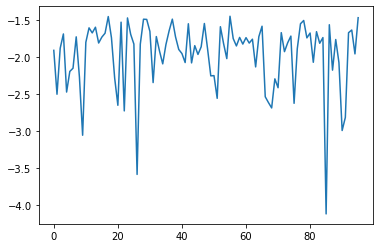

trening zakonczony po 199.13270664215088
lowest 85


In [69]:
theta = fit(X,y)

In [67]:
print(evaluate(theta, X, y))
print(evaluate(theta, v_X, v_y))

0.9090513700285121
0.9109947643979057
